# 母集団と標本

- 大きな集団から一部を取り出してきたデータからもとの集団の性質に推測する
- とくに推測統計のキーポイントである標本分布について理解するのが目的

## 4.1 母集団と標本
- 母集団：もともと関心の対象であったデータ全体
- 標本：その一部を切り出したデータ
- 標本抽出：母集団から標本をとりだすこと
- 母数:母集団の性質を表す統計的指標（比率、平均、分散、相関係数など）

## 4.2 推測統計の分類
- 推定：具体的な値を用いて「母数の値はこれくらいだろう」という結論を導くもの
    - 点推定：1つの値で推定の結果をあらわすもの
    - 区間推定：ある程度の幅をもった区間で結果を表す
- 検定：母集団についてのべた異なる立場の2つの主張のどちらを採択するかを決めるもの

## 4.3 点推定

### 4.3.1 点推定の手順
- サンプルサイズ：標本に含まれるデータの個数
- 点推定：標本の平均を算出する

例題）17際の日本人男性全体の平均身長の推定

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statistics

In [4]:
# 10人の17歳男性の身長データ
height_list = [165.2, 175.9, 161.7, 174.2, 172.1,
               163.3, 170.9, 170.6, 168.4, 171.3]

In [9]:
# 平均をもとめる
# これが点推定
height_array = np.array(height_list)
np.average(height_array)

169.36

データの平均値の算出には2つの意味がある
- 記述統計：データの数値要約のための代表値をもとめること
- 推測統計；母平均の点推定をおこなうこと

### 4.3.2 推定量と推定値
- 標本統計量：標本データから計算されるもの
    - 平均
    - 分散
    - 標準偏差
    - 相関係数
- 同じ平均でも、母集団の平均と標本の平均を区別する必要がある場合には以下の呼び方
    - 母平均
    - 標本平均
- （母数の）推定量：母数を推定するために用いられる標本統計量
- 推定値：標本データを用いて計算された推定量の値

In [12]:
# 母集団の身長の分散＝標本の不偏分散
# numpyの場合は標本分散がデフォルト
# 不偏分散を求めたい場合は、ddof=1という指定が必要
np.var(height_array, ddof=1)

21.667111111111122

In [13]:
# ちなみにddof=1を指定しないと...以下のようになる
np.var(height_array)

19.50040000000001

表 母数と推定量

|  母数  |  推定量  |　　推定値 |
| ---- | ---- | ---- |
|  母平均  |  標本平均  | 標本データから計算された標本平均 |
|  母分散  |  不偏分散  |  標本データから計算された不偏分散の値 |
|  母標準偏差  |  不偏分散の正の平方根  |  標本データから計算された不偏分散の正の平方根の値|
|  母相関係数　　|  標本相関係数  |  標本データから計算された標本相関係数の値  |
|  母比率  |  標本比率  |  標本データから計算された標本比率の値　　|

### 4.3.3 標本抽出に伴う誤差

- 大事なこと
    - 実際の母数の値にどれぐらい近い推定値を得ることができるのか
    - 推定の結果はどれぐらい信用できるのか
- 標本誤差：抽出された標本データを用いたことが原因で生じる誤差

## 4.4 推定値がどれぐらいあてになるのかを調べる方法

準備として、標本に含まれる個々のデータの値がどのようにして決まるのかを見ていく
1. 標本抽出の方法としての単純無作為抽出
1. 単純無作為抽出によって得られるデータの性質としての確率変数
1. 確率変数がどのような値をとるのかを示す確率分布
1. 確率分布を用いた母集団の表現としての母集団分布
1. 代表的な母集団分布である正規分布
1. 正規分布の母集団から標本を抽出する方法

### 4.4.1 標本抽出の方法（単純無作為抽出）
- 単純無作為抽出：母集団のなかのどのデータも平等に選ばれる可能性を持っているような標本抽出の方法
- 無作為標本；単純無作為抽出によって得られた標本

### 4.4.2 確率変数
- 確率変数：実際に結果が得られるまでどのような値が得られるかが決まっていない変数
- 単純無作為抽出によってデータがえられる場合は、その変数は確率変数であるといえる

### 4.4.3 確率分布
- 確率変数は結果を見るまで実際にどんな値が得られるかをあらかじめ知ることはできない
- 確率分布：ある確率変数がどのような値をどのような確率でとるかを表した分布
- 「確率変数Xは確率分布Aにしたがう」という言い方をする
- 確率分布は理論的に決められる

In [23]:
# 乱数の生成
arr = np.random.randint(1, 7, (6000000))

In [30]:
# bincountでやると0も数えようとする
np.bincount(arr)

array([      0,  999583, 1000159,  999538, 1001319,  999441,  999960])

In [29]:
# カウント
key, cnt = np.unique(arr, return_counts = True)
for k,c in zip(key,cnt):
    print(k,c)

1 999583
2 1000159
3 999538
4 1001319
5 999441
6 999960


### 4.4.4 母集団分布
- 母集団分布：ある変数の母集団における分布
- 無作為抽出を行った場合、標本として抽出される1つのデータに関する確率分布は、母集団分布とおなじになる
- 母集団分布は、母集団からどのような値のデータが抽出されやすいかを示した個々のデータに関する確率分布

### 4.4.5 正規分布
- 左右対称の釣鐘型の分布
- 現実世界のなかでもみられる
    - ある1つの数値を目標とした作業で生じる偶然的な誤差の分布
    - 性別と年齢を固定したときの身長の分布
- 数学的に好ましい性質と持っている
- 正規分布は、平均と分散（あるいは「標準偏差）がわかれば分布が決まる。

(array([  4.,   6.,   2.,  11.,  15.,  21.,  25.,  36.,  53.,  74., 118.,
        136., 170., 255., 308., 366., 453., 486., 508., 551., 632., 607.,
        641., 606., 605., 562., 513., 422., 405., 350., 258., 211., 155.,
        147.,  93.,  75.,  37.,  29.,  16.,   9.,  13.,   8.,   2.,   2.,
          2.,   0.,   0.,   0.,   0.,   2.]),
 array([-3.58973208, -3.42885823, -3.26798438, -3.10711053, -2.94623668,
        -2.78536283, -2.62448898, -2.46361513, -2.30274128, -2.14186743,
        -1.98099359, -1.82011974, -1.65924589, -1.49837204, -1.33749819,
        -1.17662434, -1.01575049, -0.85487664, -0.69400279, -0.53312894,
        -0.3722551 , -0.21138125, -0.0505074 ,  0.11036645,  0.2712403 ,
         0.43211415,  0.592988  ,  0.75386185,  0.9147357 ,  1.07560955,
         1.23648339,  1.39735724,  1.55823109,  1.71910494,  1.87997879,
         2.04085264,  2.20172649,  2.36260034,  2.52347419,  2.68434804,
         2.84522189,  3.00609573,  3.16696958,  3.32784343,  3.48871728,
 

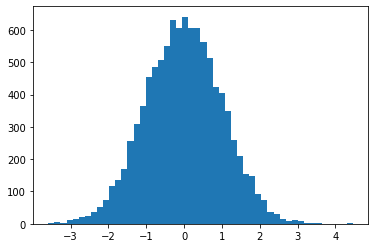

In [38]:
# np.random.normal(平均, 標準偏差, 数)
x = np.random.normal(0, 1, 10000)
plt.hist(x, bins=50)

### 4.4.6 正規分布
- 標準正規分布：平均0、分散1の正規分布
- 確率分布は、確率を面積で表現する
- 確率密度関数：確率密度を確率変数の値の関数として表したもの

### 4.4.7 正規母集団から単純無作為抽出を行う

正規母集団（母集団から正規分布である母集団）から無作為標本を抽出してみる

In [42]:
x = np.random.normal(50, 10, 5)

(array([1., 0., 0., 1., 0., 0., 0., 1., 0., 2.]),
 array([37.90657429, 39.66707688, 41.42757947, 43.18808206, 44.94858465,
        46.70908724, 48.46958983, 50.23009242, 51.99059501, 53.7510976 ,
        55.51160019]),
 <a list of 10 Patch objects>)

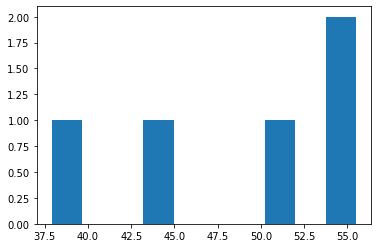

In [43]:
plt.hist(x)

- 正規母集団から無作為抽出によって得られる確率変数は正規分布にしたがうといわれる
- ただし、標本データのヒストグラムを見ただけではわからない

(array([  6.,   7.,  16.,  44.,  56.,  86.,  87., 123., 115., 126., 100.,
         81.,  56.,  34.,  35.,  16.,   5.,   4.,   1.,   2.]),
 array([24.33728638, 27.34537728, 30.35346818, 33.36155908, 36.36964998,
        39.37774087, 42.38583177, 45.39392267, 48.40201357, 51.41010447,
        54.41819537, 57.42628627, 60.43437717, 63.44246806, 66.45055896,
        69.45864986, 72.46674076, 75.47483166, 78.48292256, 81.49101346,
        84.49910436]),
 <a list of 20 Patch objects>)

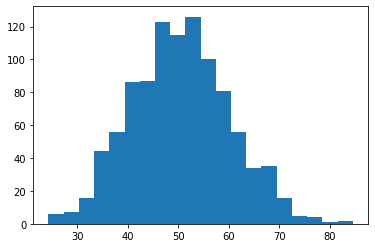

In [47]:
x = np.random.normal(50, 10, 1000)
plt.hist(x, bins=20)

## 4.5 標本分布
- 標本分布：標本統計量に関する確率分布
- 無作為標本に含まれる個々のデータは確率変数
- 標本分布は標本における個々のデータの実現値を表した度数分布ではない

### 4.5.1 標本分布から何がわかるのか
